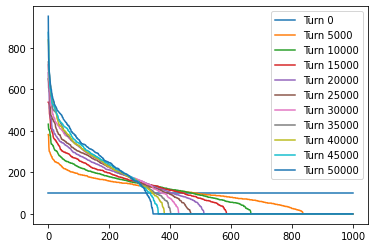

In [73]:
"""
Game 1 - No competition
---

The rules:
1. P players start with $100 each
2. In a single turn, each player makes a random bet: heads or tails
3. A coin is flipped. Players make or lose $1 depending if their bet matches the outcome of the coin flip
  - Note: the game is not zero-sum and players do not bet against each other. 
  - For example, all players can make $1 in a single turn
4. If players lose all their money, they are no longer allowed to bet
5. After N turns, the players are ranked by winnings
"""

import random
import matplotlib.pyplot as plt


def random_outcome():
    return random.choice(['H', 'T'])


class Player:
    def __init__(self, id):
        self.id = id
        self.bankroll = 100
        self.record = []

    def guess(self):
        return random_outcome()

    def process_turn_outcome(self, winFlag):
        """ winFlag: 1 (win) or 0 (loss) """
        self.record.append(winFlag)
        self.bankroll += (1 if winFlag == 1 else -1)


def turn(players):
    guesses = { 
        player.id: player.guess() 
        for player in players.values() 
        if player.bankroll > 0 
    }
    coinFlipOutcome = random_outcome()
    for playerId, playerGuess in guesses.items():
        winFlag = 1 if playerGuess == coinFlipOutcome else 0
        players[playerId].process_turn_outcome(winFlag)


numPlayers = 1000
numTurns = 50000
players = { playerId: Player(id=playerId) for playerId in range(numPlayers) }

def plot_sorted_winnings(players, label):
    sortedWinnings = sorted([player.bankroll for player in players.values()], reverse=True)
    plt.plot(sortedWinnings, label=label)

for i in range(numTurns):
    if i % 5000 == 0:
        plot_sorted_winnings(players, label=f'Turn { i }')
    turn(players)
plot_sorted_winnings(players, label=f'Turn { numTurns }')
plt.legend()


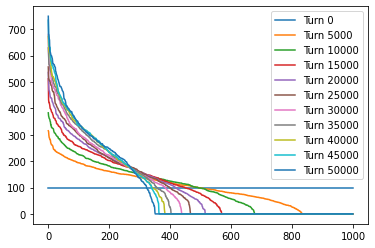

In [74]:
"""
Game 2 - Competition
---

The rules:
1. P players start with $100 each
2. In a single turn, players are randomly paired. Players in a pair randomly bet against each other
3. A coin is flipped. Players make or lose $1 depending if their bet matches the outcome of the coin flip
  - Note: the game is zero-sum as each player can only make $1 when the opposing paired player loses $1
4. If players lose all their money, they are no longer allowed to bet
5. If there are an odd number of players at the start of a turn, a random player is chosen who will not participate in the turn
5. After N turns, the players are ranked by winnings
"""


def turn_2(players):
    playerIds = [
        playerId 
        for playerId, player in players.items() 
        if player.bankroll > 0
    ]
    random.shuffle(playerIds) # shuffle in place
    if len(playerIds) % 2 == 1:
        del playerIds[-1]
    # if not playerIds: # only one player left with money
    #     return
    playerIdPairs = [
        (playerIds[i], playerIds[i+1])
        for i in range(0, len(playerIds), 2)
    ]
    firstPlayerWinOutcomes = [
        players[playerOneId].guess() 
        for playerOneId, playerTwoId in playerIdPairs
    ]
    coinFlipOutcome = random_outcome()
    for (playerOneId, playerTwoId), firstPlayerWinOutcome in zip(playerIdPairs, firstPlayerWinOutcomes):
        if coinFlipOutcome == firstPlayerWinOutcome:
            playerOneWinFlag, playerTwoWinFlag = 1, 0
        else:
            playerOneWinFlag, playerTwoWinFlag = 0, 1
        players[playerOneId].process_turn_outcome(playerOneWinFlag)
        players[playerTwoId].process_turn_outcome(playerTwoWinFlag)
        



numPlayers = 1000
numTurns = 50000
players = { playerId: Player(id=playerId) for playerId in range(numPlayers) }

def plot_sorted_winnings(players, label):
    sortedWinnings = sorted([player.bankroll for player in players.values()], reverse=True)
    plt.plot(sortedWinnings, label=label)

for i in range(numTurns):
    if i % 5000 == 0:
        plot_sorted_winnings(players, label=f'Turn { i }')
    turn_2(players)
plot_sorted_winnings(players, label=f'Turn { numTurns }')
plt.legend()